## Exploratory Data Analysis 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../data/" directory

# Load the train data
train_values_file_path = '../data/train-set-values.csv'
train_values = pd.read_csv(train_values_file_path)
X = train_values.copy()

train_labels_file_path = '../data/train-set-labels.csv'
train_labels = pd.read_csv(train_labels_file_path)
y = train_labels.copy()

X_y = pd.concat([X.set_index('id'),y.set_index('id')], axis=1, join='inner').reset_index()

# Load the test data
test_file_path = '../data/test-set-values.csv'
test_values = pd.read_csv(test_file_path)
X_test = test_values.copy()

In [2]:
# set seaborn color palatte
palette=["C2", "C1", "C0"]
customPalette = sns.set_palette(sns.color_palette(palette))

### Explore Target Class Distribution

In [3]:
y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


<AxesSubplot:xlabel='status_group', ylabel='count'>

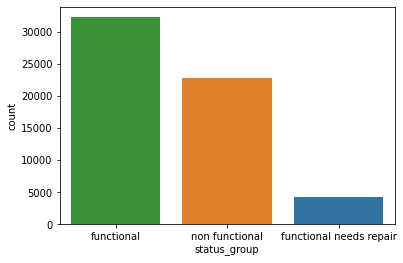

In [4]:
sns.countplot(x="status_group", data=y)

In the training data, the data belonging to the category `functional needs repair` are much less comparative to other 2 target categories. i.e. a clear cut target class imbalance is observed. This needs to be taken into account in later stages.

### Explore Training Data

In [5]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


#### Inspect numerical columns

In [6]:
X.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


#### Inspect categorical columns

In [7]:
X.describe(include=[object]).T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


#### Identify Missing Values

<AxesSubplot:>

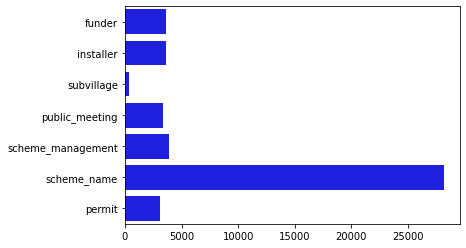

In [8]:
missing_vals=X.isnull().sum()
missing_vals=missing_vals[missing_vals > 0]
sns.barplot(x=missing_vals.values, y=missing_vals.index, color='b')

There are 7 categorical columns with missing values. Almost 50% of the values are missing from `scheme_name`.

In addition, from the numerical columns `amount_tsh`, `num_private`, `population`, and `construction_year` have more than 25% of the values as 0. (This can be observed from the fact that for all these columns, the min value and the 25th percentile are both 0). It is highly likely that these are recorded as 0 because the actual values are missing. 

#### Identify Mostly Unique Columns

Based on column header names and description, the following columns can be identified as unique columns.
- `id`
- `wpt_name`
- `num_private`

In addition, based on inspection on categorical columns, following column can also be identified as mostly unique.
- `subvillage`

#### Features with Promising Prospects

#### `construction_year`

Intuitively, we can think that a pump is more likely to fail when its old. Following plot shows that this intuitive understanding is valid. 

<AxesSubplot:xlabel='count', ylabel='construction_year'>

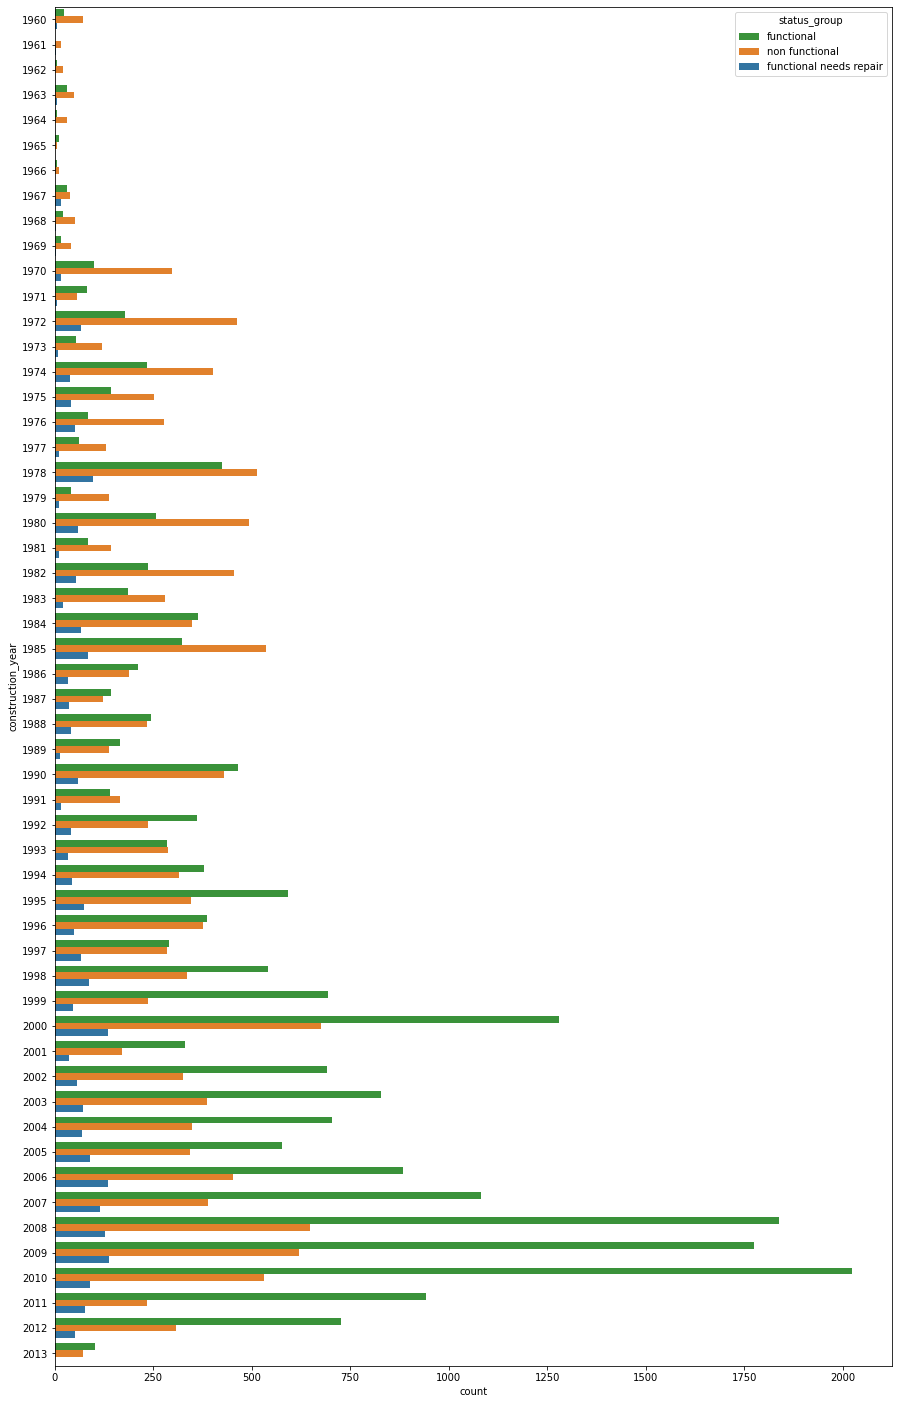

In [11]:
plt.figure(figsize=(15,25))
sns.countplot(y="construction_year", hue="status_group", data=X_y[-(X_y.construction_year == 0)])

#### `funder`

It is reasonable to assume that the `funder` could affect the sate of the pumps because some funders may promptly pay for repairs while other may delay or not pay at all.

However according to the inspection done on categorical columns, there are 1897 unique values for funder. Therefore considering all funders is not possible. Threfore we'll consider the top 10 funders only 

<AxesSubplot:xlabel='count', ylabel='funder'>

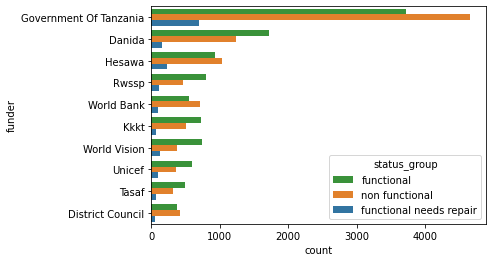

In [10]:
sns.countplot(y="funder", hue="status_group", data=X_y, order=X_y.funder.value_counts().iloc[:10].index)

It is evident that out of the pumps funded by Govt. of Tanzania, Hesawa, World Bank, and, Distric councils, majority are non functional.

#### `installer`

`installer` is also highly likely to affect the state of the pumps due to the change of quality of installation amognst different installers. 

In this case also, there are 2145 unique values. We'll consider the top 10 installers only.

<AxesSubplot:xlabel='count', ylabel='installer'>

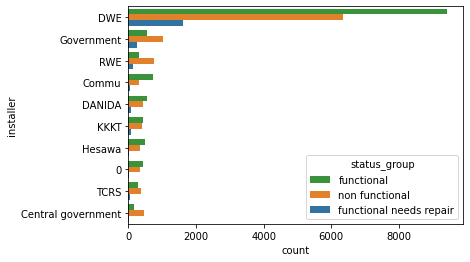

In [12]:
sns.countplot(y="installer", hue="status_group", data=X_y, order=X_y.installer.value_counts().iloc[:10].index)

A majority of the pumps installed by Gvernment, RWE, TCRS, and, Central Government are non functional. 

(0 indicates missing values)

#### `basin`

On the argument that basin can affect water purity which then can affect the lifespan of a pump, we can think that `basin` can also correlate with functional status of a pump.   

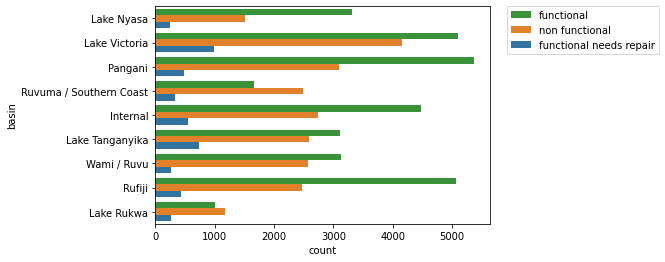

In [22]:
sns.countplot(y="basin", hue="status_group", data=X_y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

A majority of the pumps which belong to Rawuma and Lake Rukwa are non functional. 